# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [34]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [35]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
Cities = cities

# Print the city count to confirm sufficient count
len(cities)

619

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [36]:
# Setting up url syntax
url = "http://api.openweathermap.org/data/2.5/weather?"
iu = "metric"
mod_url = f"{url}appid={weather_api_key}&units={iu}&q="

# Make lists to store all the data needed from the API.  Keep empty lists in this cell so they reset if cell is ran again.
Cities = []
Cloudiness = []
Country = []
Date = []
Humidity = []
Lat =[]
Lng = []
MaxTemp = []
WindSpeed = []

rec_cnt = 0

# Loop through cities to retrieve the data into the lists above
print(f"Beginning Data Retrieval  \n-----------------------------")

for city in cities:
    try:
        req = requests.get(mod_url + city).json()
        Cities.append(req['name'])
        Cloudiness.append(req['clouds']['all'])
        Country.append(req['sys']['country'])
        Date.append(req['dt'])
        Humidity.append(req['main']['humidity'])
        Lat.append(req['coord']['lat'])
        Lng.append(req['coord']['lon'])
        MaxTemp.append(req['main']['temp_max'])
        WindSpeed.append(req['wind']['speed'])
        rec_cnt += 1
        print(f"Processing Record {rec_cnt} | {city}")
    except KeyError:
        print("City not found. Skipping...")

print(f"----------------------------- \nData Retrieval Complete \n-----------------------------")

Beginning Data Retrieval  
-----------------------------
Processing Record 1 | rikitea
Processing Record 2 | saskylakh
Processing Record 3 | busselton
City not found. Skipping...
Processing Record 4 | tazovskiy
Processing Record 5 | vaini
Processing Record 6 | jamestown
Processing Record 7 | tessalit
Processing Record 8 | praia da vitoria
Processing Record 9 | fort saint james
Processing Record 10 | itamaraca
Processing Record 11 | tiksi
Processing Record 12 | ketchikan
Processing Record 13 | chokurdakh
Processing Record 14 | mahebourg
Processing Record 15 | tasiilaq
Processing Record 16 | buchanan
Processing Record 17 | palmer
Processing Record 18 | nanortalik
Processing Record 19 | mataura
Processing Record 20 | shimoda
Processing Record 21 | klaksvik
Processing Record 22 | sao borja
Processing Record 23 | albany
Processing Record 24 | puerto ayora
Processing Record 25 | leningradskiy
City not found. Skipping...
Processing Record 26 | jagdispur
Processing Record 27 | yellowknife
Proc

Processing Record 228 | huilong
City not found. Skipping...
City not found. Skipping...
Processing Record 229 | iqaluit
Processing Record 230 | ostrovnoy
Processing Record 231 | mpulungu
Processing Record 232 | rock springs
Processing Record 233 | kisangani
Processing Record 234 | itarema
Processing Record 235 | chicama
City not found. Skipping...
Processing Record 236 | tiznit
Processing Record 237 | rawson
Processing Record 238 | sampit
Processing Record 239 | port hedland
Processing Record 240 | dikson
Processing Record 241 | san rafael
Processing Record 242 | damghan
Processing Record 243 | almeirim
City not found. Skipping...
Processing Record 244 | zhigalovo
Processing Record 245 | puerto colombia
Processing Record 246 | turuvekere
Processing Record 247 | sao gabriel da cachoeira
City not found. Skipping...
Processing Record 248 | kalmunai
Processing Record 249 | lauria
Processing Record 250 | christiansburg
Processing Record 251 | khatanga
Processing Record 252 | mersing
Process

Processing Record 454 | huanuco
Processing Record 455 | jambi
Processing Record 456 | troitsko-pechorsk
Processing Record 457 | peniche
Processing Record 458 | bonthe
Processing Record 459 | ariquemes
Processing Record 460 | sao joao da barra
Processing Record 461 | doka
Processing Record 462 | bambanglipuro
Processing Record 463 | bogande
Processing Record 464 | beira
Processing Record 465 | uusikaupunki
Processing Record 466 | nhulunbuy
City not found. Skipping...
City not found. Skipping...
Processing Record 467 | the pas
City not found. Skipping...
Processing Record 468 | borzya
City not found. Skipping...
Processing Record 469 | gwadar
Processing Record 470 | sitka
Processing Record 471 | acajutla
Processing Record 472 | alice springs
Processing Record 473 | laurel
City not found. Skipping...
Processing Record 474 | alta floresta
Processing Record 475 | binzhou
Processing Record 476 | basco
Processing Record 477 | kargasok
Processing Record 478 | mount isa
Processing Record 479 | 

### Convert Raw Data to DataFrame
- Export the city data into a .csv
- Display the DataFrame

In [37]:
# Make a dataframe with the retried data
df = pd.DataFrame({'City':Cities, 'Country':Country,
                   'Date':Date, 'Cloudiness':Cloudiness, 
                   'Humidity':Humidity, 'Lat':Lat, 'Lng':Lng,
                   'Max Temp':MaxTemp, 'Wind Speed':WindSpeed})

# Export into .csv
df.to_csv(r'Output\city_data.csv')

# Display the DataFrame
df.head()

,City,Country,Date,Cloudiness,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Rikitea,PF,1570421172,100,86,-23.12,-134.97,23.19,5.06
1,Saskylakh,RU,1570421172,90,95,71.97,114.09,-7.45,2.87
2,Busselton,AU,1570421023,3,33,-33.64,115.35,22.22,3.65
3,Tazovskiy,RU,1570421172,96,85,67.47,78.70,1.78,10.08
4,Vaini,IN,1570421172,40,94,15.34,74.49,23.00,1.06


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

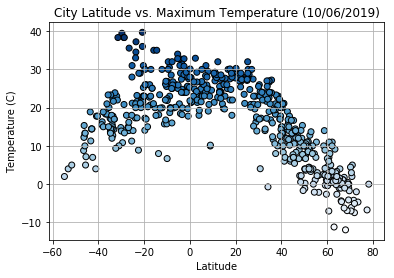

In [38]:
# Scatter Plot showing Latitude vs. Temperature using the data retrived
plt.xlabel('Latitude')
plt.ylabel('Temperature (C)')
plt.title('City Latitude vs. Maximum Temperature (10/06/2019)')
plt.grid(True)

gradient = MaxTemp

plt.scatter(Lat, MaxTemp, marker='o',
            edgecolor='black', # edgecolor refers to the marker's edgecolor
            c=gradient, # c (color sequence) needs the values for the gradient
            cmap='Blues'); # cmap defines a set range of colors to traverse based on marker values
                           # add '_r' to the end of cmap color range (e.g. Blues_r) to reverse the order

#### Latitude vs. Humidity Plot

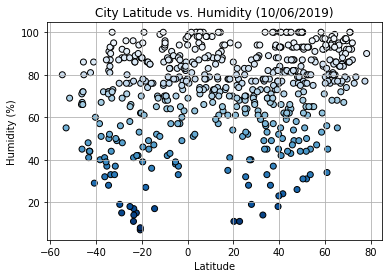

In [39]:
# Scatter Plot showing Latitude vs. Humidity using the data retrived
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('City Latitude vs. Humidity (10/06/2019)')
plt.grid(True)

gradient = Humidity

plt.scatter(Lat, Humidity, marker='o',
            edgecolor='black', # edgecolor refers to the marker's edgecolor
            c=gradient, # c paramater (color sequence) needs the values for the gradient
            cmap='Blues_r'); # cmap defines a set range of colors to traverse based on marker values
                           # add '_r' to the end of cmap color range (e.g. Blues_r) to reverse the order

#### Latitude vs. Cloudiness Plot

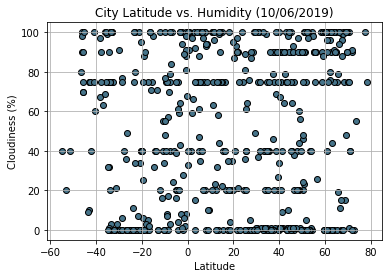

In [40]:
# Scatter Plot showing Latitude vs. Cloudiness using the data retrived
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('City Latitude vs. Humidity (10/06/2019)')
plt.grid(True)

gradient = Humidity

plt.scatter(Lat, Cloudiness, marker='o',
            edgecolor='black', # edgecolor refers to the marker's edgecolor
            color='#46748A'); # Call specific colors using Adobe Color ID's

## Linear Regression

In [41]:
# OPTIONAL: Create a function to create Linear Regression plots
def linreg(x_values, y_values, x_axis, y_axis):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    # plt.annotate(line_eq, (6,10), xytext=(5,5), fontsize=15, textcoords=tform, color="red")
    plt.xlabel(x_axis)
    plt.ylabel(y_axis)
    print(f"The r-squared is {rvalue}")
    print(f"{line_eq}")
    plt.show()

In [42]:
# Create Northern and Southern Hemisphere DataFrames
ndf = df.loc[df['Lat'] > 0, :]

sdf = df.loc[df['Lat'] < 0, :]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is -0.870094910925898
y = -0.46x + 31.98


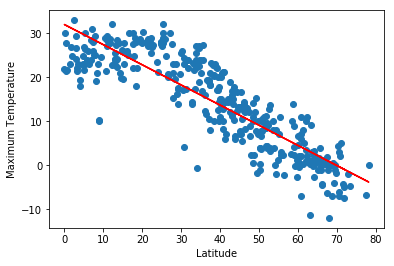

In [43]:
linreg(ndf['Lat'], ndf['Max Temp'], 'Latitude', 'Maximum Temperature')

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is 0.5525127331537931
y = 0.31x + 27.79


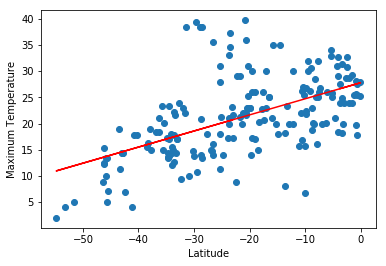

In [44]:
linreg(sdf['Lat'], sdf['Max Temp'], 'Latitude', 'Maximum Temperature')

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is 0.08630161493347456
y = 0.08x + 72.95


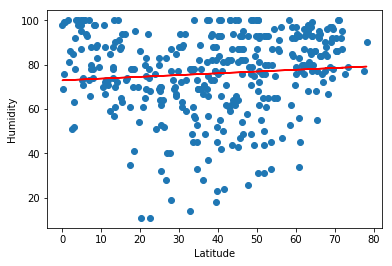

In [45]:
linreg(ndf['Lat'], ndf['Humidity'], 'Latitude', 'Humidity')

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is 0.19064156128026455
y = 0.31x + 74.04


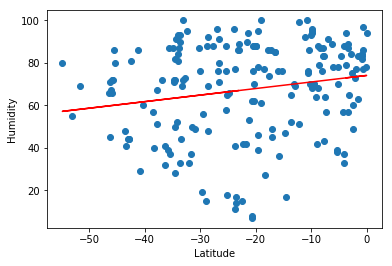

In [46]:
linreg(sdf['Lat'], sdf['Humidity'], 'Latitude', 'Humidity')

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is 0.05548947163052199
y = 0.11x + 48.18


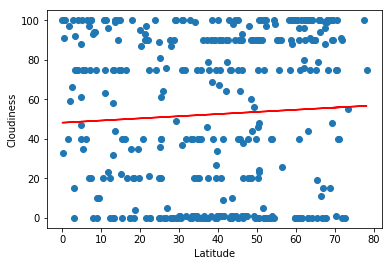

In [47]:
linreg(ndf['Lat'], ndf['Cloudiness'], 'Latitude', 'Cloudiness')

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is -0.09142855015088498
y = -0.25x + 39.74


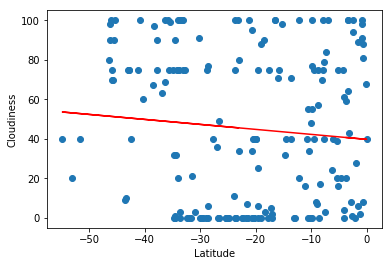

In [48]:
linreg(sdf['Lat'], sdf['Cloudiness'], 'Latitude', 'Cloudiness')

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is 0.2599643000602841
y = 0.03x + 2.28


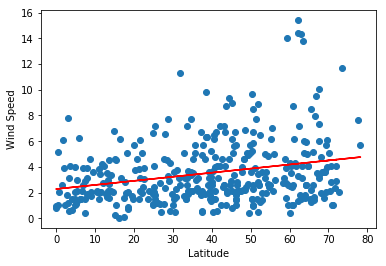

In [49]:
linreg(ndf['Lat'], ndf['Wind Speed'], 'Latitude', 'Wind Speed')

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is -0.17935141921738867
y = -0.03x + 3.35


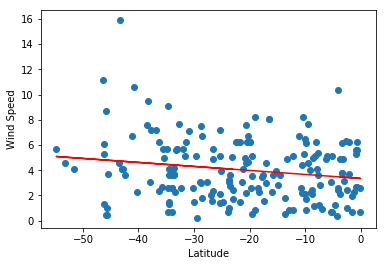

In [50]:
linreg(sdf['Lat'], sdf['Wind Speed'], 'Latitude', 'Wind Speed')